# Task 4
### Stock Market Prediction using Numerical and Textual Analysis
### Submitted By : Yash Modi
___Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines - Stock to analyze and predict - SENSEX (S&P BSE SENSEX)___

Download historical stock prices URL:- https://finance.yahoo.com

Download textual (news) data URL:- https://bit.ly/36fFPI6

**Sentimental Analysis of News headlines**


In [1]:
import pandas as pd
pd.set_option('display.max_row', 1100)
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('india-news-headlines.csv')
df['publish_date'] = pd.to_datetime(df['publish_date'], format = '%Y%m%d')
df['publish_date'].nunique()

7080

In [5]:
df.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [7]:
df.describe()

,publish_date,headline_category,headline_text
count,3297172,3297172,3297172
unique,7080,1016,3082589
top,2018-12-31 00:00:00,india,Sunny Leone HOT photos
freq,766,285619,98
first,2001-01-01 00:00:00,NaN,NaN
last,2020-06-30 00:00:00,NaN,NaN


In [8]:
set(df['headline_category'])
df['headline_category'].nunique()

1016

In [9]:
set(df['headline_category'])


{'thirupuram',
 'sports.football.epl.interviews',
 'entertainment.bhojpuri.movies.news',
 'city.ajmer',
 'santosh-desai.city-city-bang-bang',
 'city.bhubaneswar',
 'sports.cricket.afghanistan-tour-of-india',
 'sports.cricket.asia-cup',
 'life-style.fashion.shows',
 'sports.boxing',
 'unknown',
 'life-style.fashion.designers',
 'sports.wwe',
 'entertainment.events',
 'sports.rio-2016-olympics.news.basketball',
 'life-style',
 'elections.assembly-elections.gujarat',
 'entertainment.marathi.movies.did-you-know',
 'economic-survey-2011',
 'janmashtami.janmashtami-stories',
 'first-look',
 'city.ghaziabad',
 'home.auto',
 'life-style.health-fitness',
 'international-womens-day',
 'entertainment.marathi.movie-reviews',
 'education-fest.united-kingdom.stories',
 'sports.tennis.french-open-2016',
 'jaipur',
 'budget-2015.common-man',
 'best-products.electronics.headphones',
 'sports.tennis.us-open-2019',
 'elections.assembly-elections.goa.news',
 'home.campaigns',
 'entertainment.hindi.special

### Number of articles from each city
- selecting only city category

In [10]:
city_data = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [11]:
city_data.reset_index(inplace=True)

In [12]:
city_data.drop(columns = 'index')

,publish_date,headline_category,headline_text
0,2001-01-04,city.bengaluru,Three in race for chief secy's post
1,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines
2,2001-01-04,city.bengaluru,He's not so inscrutable
3,2001-01-04,city.delhi,DPCC stages Nyay rally
4,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
1842283,2020-06-30,city.delhi,Remove illegal signage or face penalty: NDMC
1842284,2020-06-30,city.bengaluru,what bengaluru can do to tackle covid surge
1842285,2020-06-30,city.bengaluru,karnataka may adopt keralas triple lockdown plan
1842286,2020-06-30,city.kanpur,vehicle of up stf team bringing gangster vikas...


**- split city word and name of city which join by '.' we need only cities name and stored it in to 'city_name' column***


In [13]:
city_data['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
city_data.drop(columns='index')

,publish_date,headline_category,headline_text,city_name
0,2001-01-04,city.bengaluru,Three in race for chief secy's post,bengaluru
1,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines,patna
2,2001-01-04,city.bengaluru,He's not so inscrutable,bengaluru
3,2001-01-04,city.delhi,DPCC stages Nyay rally,delhi
4,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors,patna
...,...,...,...,...
1842283,2020-06-30,city.delhi,Remove illegal signage or face penalty: NDMC,delhi
1842284,2020-06-30,city.bengaluru,what bengaluru can do to tackle covid surge,bengaluru
1842285,2020-06-30,city.bengaluru,karnataka may adopt keralas triple lockdown plan,bengaluru
1842286,2020-06-30,city.kanpur,vehicle of up stf team bringing gangster vikas...,kanpur


In [15]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

In [16]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [17]:
# for better understanding remane the column
city_headline.rename(columns={'headline_text':'No._headline_text'},inplace=True)

**Taking only top 15 cities**

In [18]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='No._headline_text',ascending=False)
top_15_headline_city = city_headline.head(20)
top_15_headline_city

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


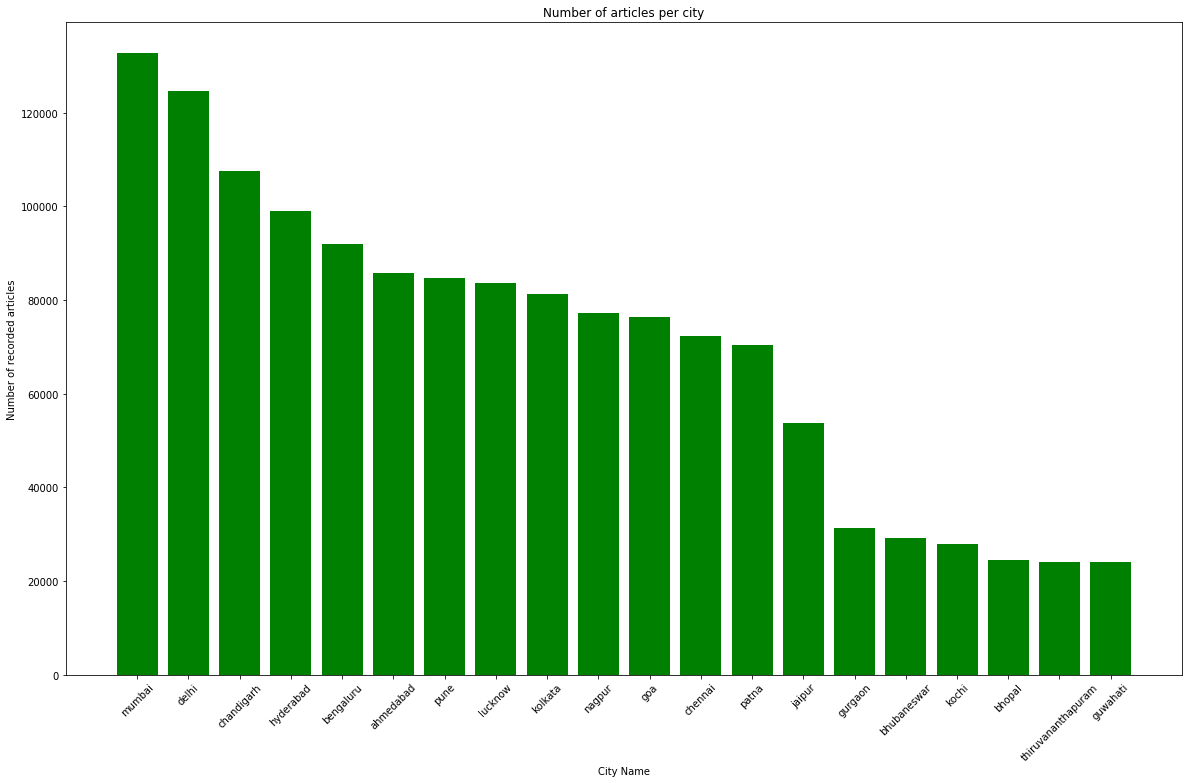

In [19]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(20,12))
# plt.grid(linestyle='--', linewidth=2)
plt.bar(top_15_headline_city.index,height=top_15_headline_city['No._headline_text'],color='green')
plt.xticks(rotation = 45)
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Number of articles per city')
plt.show()

**- Let's check Year-Wise coverage for cities**


In [20]:
#select only year
city_data['Year'] = city_data['publish_date'].dt.year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
city_data.drop(columns=['publish_date','index'],axis=1,inplace=True)
city_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,headline_category,headline_text,city_name,Year
0,city.bengaluru,Three in race for chief secy's post,bengaluru,2001
1,city.patna,Druggists' stir leads to shortage of medicines,patna,2001
2,city.bengaluru,He's not so inscrutable,bengaluru,2001
3,city.delhi,DPCC stages Nyay rally,delhi,2001
4,city.patna,Fend for yourselves; Pande tells doctors,patna,2001
...,...,...,...,...
1842283,city.delhi,Remove illegal signage or face penalty: NDMC,delhi,2020
1842284,city.bengaluru,what bengaluru can do to tackle covid surge,bengaluru,2020
1842285,city.bengaluru,karnataka may adopt keralas triple lockdown plan,bengaluru,2020
1842286,city.kanpur,vehicle of up stf team bringing gangster vikas...,kanpur,2020


###### we are extrating only years from publish_date column


In [22]:
city_data.drop(columns=['headline_text'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
c = city_data.groupby(['city_name','Year']).size().reset_index(name='counts')

In [24]:
c.head()

,city_name,Year,counts
0,agartala,2015,173
1,agartala,2016,382
2,agartala,2017,238
3,agartala,2018,299
4,agartala,2019,82


***-Exploring Data Year Wise***

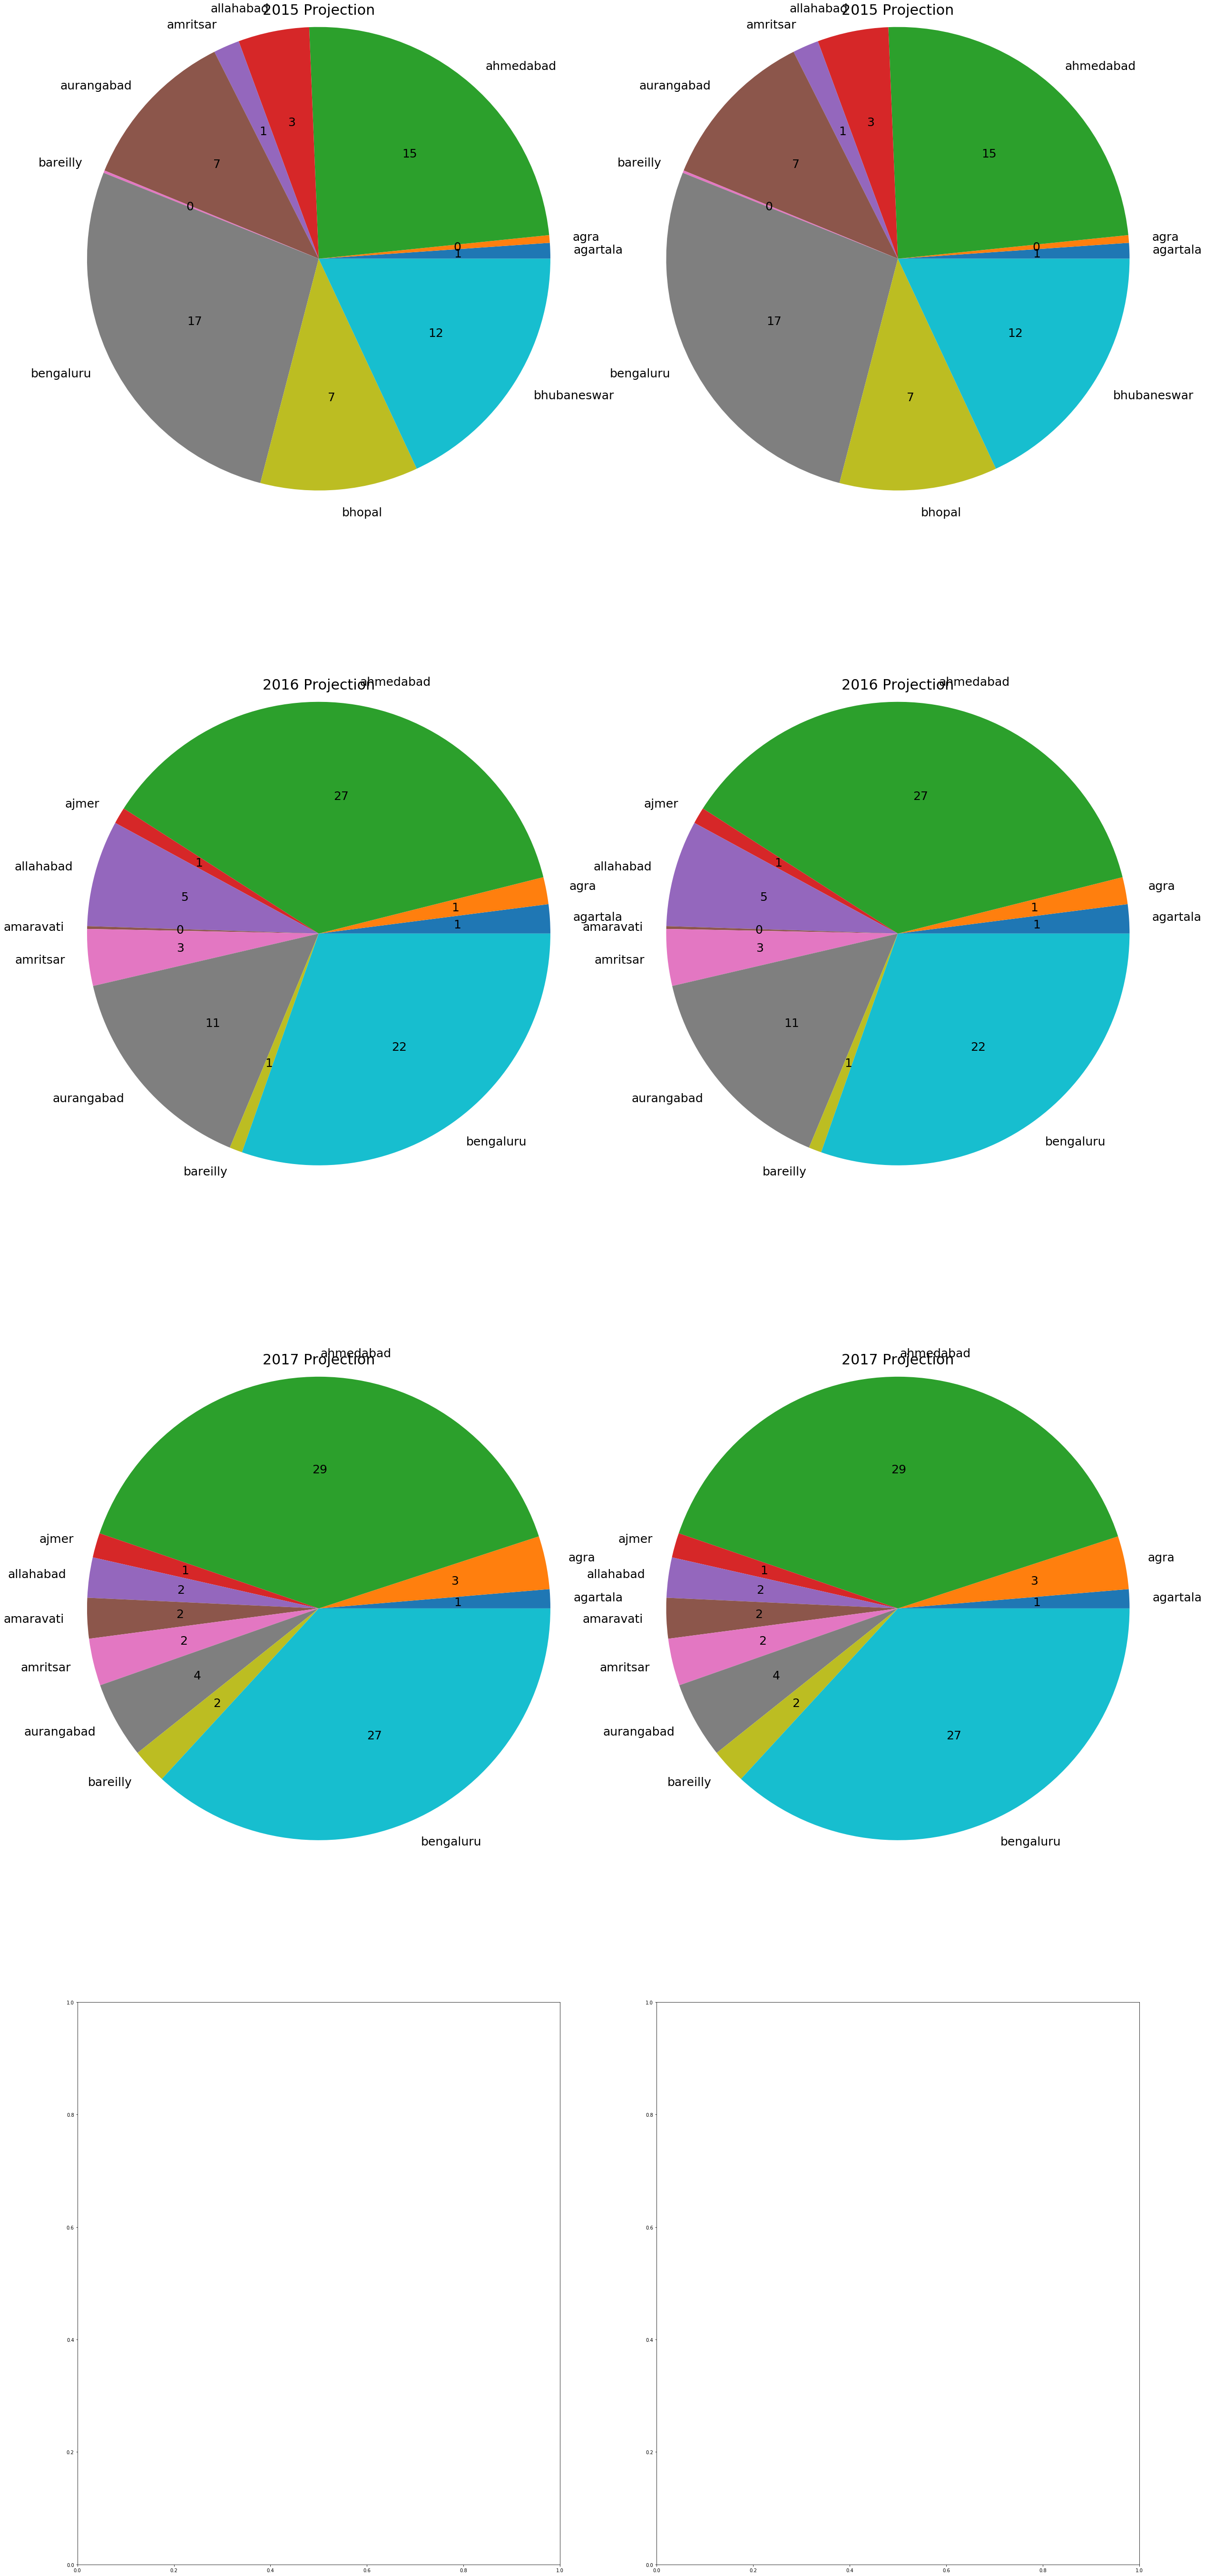

In [25]:
mainCategories = c['Year'].unique()
fig,axes = plt.subplots(len(mainCategories)-16,2,figsize=(40,100))
# axes.title("Subcategory vise Profit")
for col in range(2):
    for row,cat in zip(range(3),mainCategories):
        ax = axes[row][col]
        ax.set_title(str(cat)+' Projection',fontsize=30)
        def value(val):
            s = c[c['Year']==cat]['city_name'].nunique()
            return int(round(s*val/100,0))
        sales = c[c['Year']==cat]['counts'].head(10)
        labels = c[c['Year']==cat]['city_name'].head(10)
        ax.pie(sales,labels=labels,autopct=value,radius=1.2,textprops={'fontsize':'25'})


***- Showing Year Wise Count***

In [26]:
nd = c.drop(columns=['city_name','counts'])
nd=nd.groupby('Year').size().reset_index(name='counts')

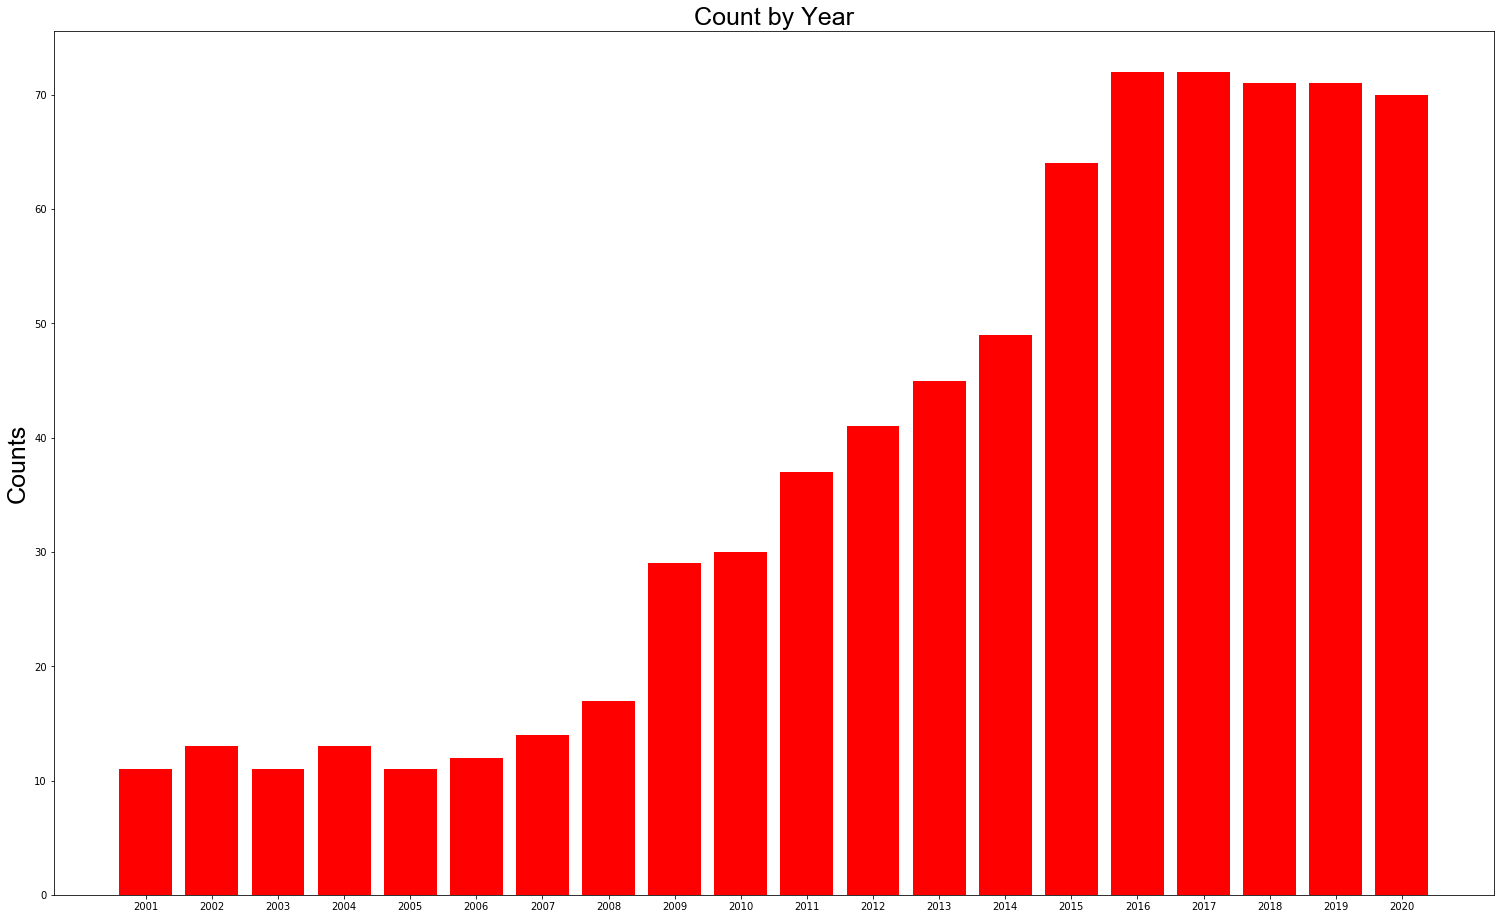

In [27]:
width = 0.35
fig = plt.figure(figsize=(20,12))
axis_font = {'fontname':'Arial', 'size':'25'}

ax = fig.add_axes([0,0,1,1])
ax.bar(nd['Year'],nd['counts'],color = 'red')
ax.set_ylabel('Counts',**axis_font)
ax.set_title('Count by Year',**axis_font)
ax.set_xticks(nd['Year'])
# ax.set_yticks(np.arange(0, 81, 10))
ax.xaxis.set_tick_params()


#### Let's see which Topic that have high no. of Coverage


In [28]:
# for safety always take copy of original data
new_data = df.copy()

- creating a new column category that contains headline categories


In [29]:
new_data['category']=new_data['headline_category'].str.split('.').map(lambda x : x[0])
new_data.head()

,publish_date,headline_category,headline_text,category
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,sports
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,unknown
3,2001-01-02,unknown,America's unwanted heading for India?,unknown
4,2001-01-02,unknown,For bigwigs; it is destination Goa,unknown


- **groupby categories and let's see which category topic have high no. of headline**

In [30]:
top_categories = new_data.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)

- **dropping some un-wanted category like unknown, tv, top-stories, city, citizen, edit-page etc**


In [31]:
top_10_cat = top_categories.drop(['unknown','city', 'tv', 'top-stories', 'edit-page','top-headlines','world']).head(10)

# reset index
top_10_cat.reset_index(inplace=True)

top_10_cat
#top_10_cat let's see the top 10 categories with No. of headlines ( india, entertainment, business, sports, life-style, tech, etc)


,category,headline_text
0,india,285619
1,entertainment,224877
2,business,153876
3,sports,129494
4,home,77208
5,life-style,43370
6,tech,37220
7,citizen,29543
8,news,13987
9,elections,9003


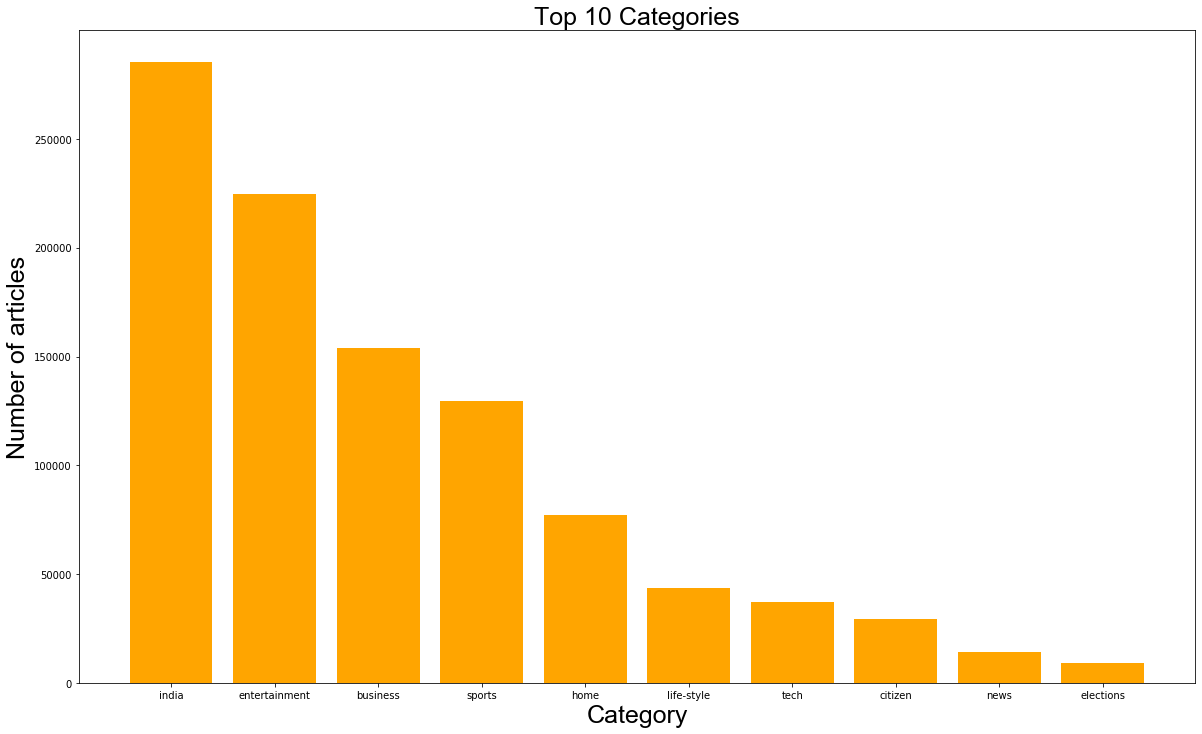

In [32]:
# visualizing top 10 categories 

plt.figure(figsize=(20,12))
plt.bar(top_10_cat.category, height=top_10_cat.headline_text,color = 'orange')
plt.xlabel('Category',**axis_font)
plt.ylabel('Number of articles',**axis_font)
plt.title('Top 10 Categories',**axis_font)
plt.show()


_India is the most published since the publication is based in India. Interestingly, Entertainment is the second-most covered topic by TOI. In fact, it's eye-opening how Bollywood is given more coverage than every other topic except for Indian Business_


### Now removing some of category as they have no impact on headlines

In [33]:
searchfor = ['entertainment', 'sport','life-style','-day','best-products','cricket','janmashtami','olympics']
df = df[~df.headline_category.str.contains('|'.join(searchfor))]
df['headline_category'].nunique()

606

- **Droping Headline category**

In [34]:
new_df=df.drop(columns='headline_category')

In [35]:
new_df.tail()

,publish_date,headline_text
3297161,2020-06-30,karnataka may adopt keralas triple lockdown plan
3297162,2020-06-30,vehicle of up stf team bringing gangster vikas...
3297165,2020-06-30,icse isc result 2020 when where to check class...
3297166,2020-06-30,up govt imposes weekend restrictions from tonight
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india


#### Grouping By Publish Date to get all the headline text

In [36]:
new_df=new_df.groupby(['publish_date'])['headline_text'].apply('.'.join).reset_index()

In [37]:
new_df.tail()

,publish_date,headline_text
7068,2020-06-26,Containment zone residents slam high prices ch...
7069,2020-06-27,Ruslaan Mumtaz: I am scared to start shooting;...
7070,2020-06-28,Another hosp starts satellite unit in hotel; m...
7071,2020-06-29,Anna Eden gets creative with husband and MP Hi...
7072,2020-06-30,Detective Byomkesh Bakshy!.First Look of Ranbi...


In [38]:
new_df['compund']=''
new_df['negative']=''
new_df['neutral']=''
new_df['positive']=''

In [39]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [41]:
for index,sentence in enumerate(new_df['headline_text']):
    polaity_score=sia.polarity_scores(sentence)
    new_df['compund'][index]=polaity_score['compound' ]
    new_df['negative'][index]=polaity_score['neg']
    new_df['neutral'][index]=polaity_score['neu']
    new_df['positive'][index]=polaity_score['pos']
new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,publish_date,headline_text,compund,negative,neutral,positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,-0.9426,0.108,0.82,0.073
1,2001-01-03,Powerless north India gropes in the dark.Think...,0.5859,0.085,0.818,0.097
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,-0.5468,0.083,0.844,0.073
3,2001-01-05,Light combat craft takes India into club class...,0.9854,0.103,0.744,0.153
4,2001-01-06,Light combat craft takes India into club class...,0.4404,0.118,0.709,0.172


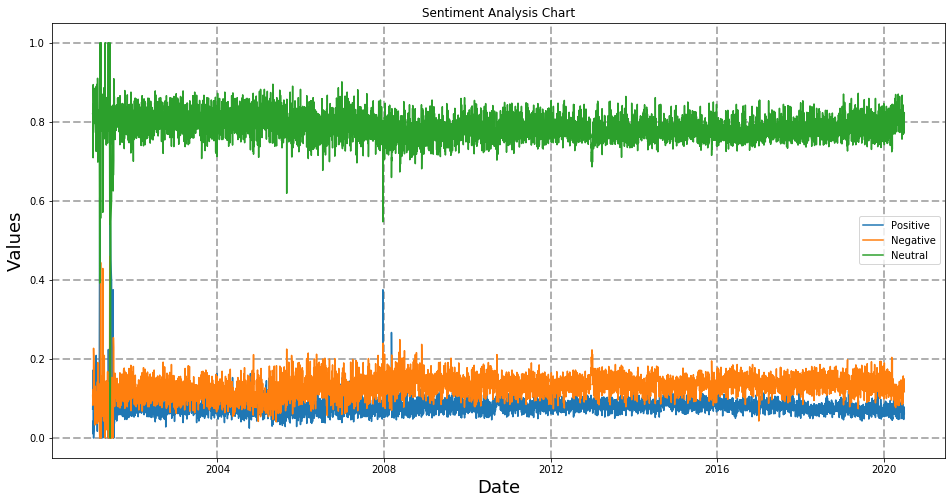

In [42]:
plt.figure(figsize=(16,8))
plt.title('Sentiment Analysis Chart')
# plt.plot(new_df['publish_date'],new_df['compund'],label='Compound')
plt.plot(new_df['publish_date'],new_df['positive'],label='Positive')
plt.plot(new_df['publish_date'],new_df['negative'],label='Negative')
plt.plot(new_df['publish_date'],new_df['neutral'],label='Neutral')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Values',fontsize=18)
plt.grid( linestyle='--', linewidth=2)
plt.legend(loc='center right')
plt.show()


In [43]:
new_df.head()

,publish_date,headline_text,compund,negative,neutral,positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,-0.9426,0.108,0.82,0.073
1,2001-01-03,Powerless north India gropes in the dark.Think...,0.5859,0.085,0.818,0.097
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,-0.5468,0.083,0.844,0.073
3,2001-01-05,Light combat craft takes India into club class...,0.9854,0.103,0.744,0.153
4,2001-01-06,Light combat craft takes India into club class...,0.4404,0.118,0.709,0.172


### Checking Sentiments using TextBlob

In [47]:
# !pip install TextBlob
sentiment = []
import numpy as np
from textblob import TextBlob
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'
sentiments = np.array([analysis_polarity(headline) for headline in new_df['headline_text']])

In [59]:
sentiments

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [48]:
df['sentiment'] = np.array([analysis_polarity(headline) for headline in df['headline_text']])

df.head()


,publish_date,headline_category,headline_text,sentiment
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral
3,2001-01-02,unknown,America's unwanted heading for India?,neutral
4,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral
5,2001-01-02,unknown,Extra buses to clear tourist traffic,positive


In [49]:
sentiment = df.groupby(['sentiment']).agg({'headline_text':'count'})
sentiment.columns.values[0] = 'count'
sentiment.reset_index(inplace=True)
sentiment

,sentiment,count
0,negative,364767
1,neutral,2031237
2,positive,496672


([<matplotlib.patches.Wedge at 0x20718d4f3c8>,
 [Text(1.2177677426832234, 0.5093542233850685, 'negative'),
  Text(-1.306478555708952, 0.18845101080294208, 'neutral'),
  Text(1.1325751569600897, -0.6779922667972167, 'positive')],
 [Text(0.6642369505544855, 0.27782957639185557, '12.61%'),
  Text(-0.7126246667503374, 0.1027914604379684, '70.22%'),
  Text(0.6177682674327761, -0.3698139637075727, '17.17%')])

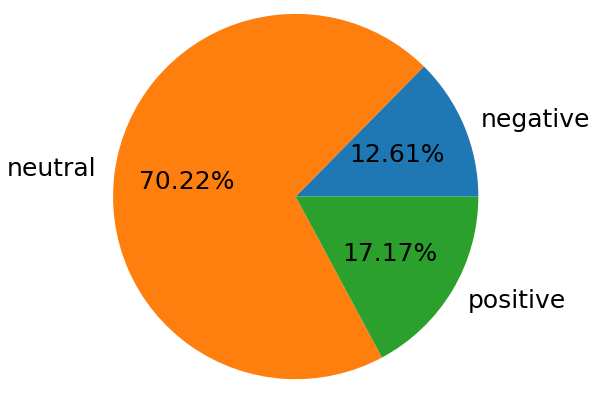

In [55]:
fig = plt.figure(figsize =(10, 7)) 

plt.pie(sentiment['count'], labels = sentiment['sentiment'],autopct='%1.2f%%',radius=1.2,textprops={'fontsize':'25'}) 

- So here there are more nuetral news than any positive and negetive

In [56]:
## Storing Files For direct use
df.to_csv('TextBlob_analysed_sentiments.csv')
new_df.to_csv('Vader_analysed_sentiments.csv')

# Stock Price Prediction
### performance prediction using numerical analysis of historical stock prices,
### - Load dataset

In [60]:
sensex_df=pd.read_csv('^BSESN.csv')
sensex_df['Date'] = pd.to_datetime(sensex_df['Date'], format = '%Y-%m-%d')
sensex_df['Date'].nunique()

4869

In [61]:
sensex_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


__Renaming Column name to publish_date__

In [62]:
sensex_df.rename(columns={'Date':'publish_date'},inplace=True)
sensex_df.set_index('publish_date')

,Open,High,Low,Close,Adj Close,Volume
publish_date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
...,...,...,...,...,...,...
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0


In [63]:
sensex_df.shape

(4869, 7)

In [64]:
sensex_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4.795000e+03
mean,18034.262572,18143.666605,17890.044829,18013.912100,18013.912100,8.189135e+04
std,10823.411039,10859.925623,10757.958972,10804.676830,10804.676830,1.080816e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,8394.479981,8485.520020,8268.844726,8378.930176,8378.930176,9.200000e+03
50%,17438.679688,17530.789063,17294.740234,17425.710938,17425.710938,1.380000e+04
75%,26668.965821,26772.745118,26469.004883,26632.209961,26632.209961,2.080000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


In [65]:
sensex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_date  4869 non-null   datetime64[ns]
 1   Open          4795 non-null   float64       
 2   High          4795 non-null   float64       
 3   Low           4795 non-null   float64       
 4   Close         4795 non-null   float64       
 5   Adj Close     4795 non-null   float64       
 6   Volume        4795 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 266.4 KB


- **Plotting Open Index of market**

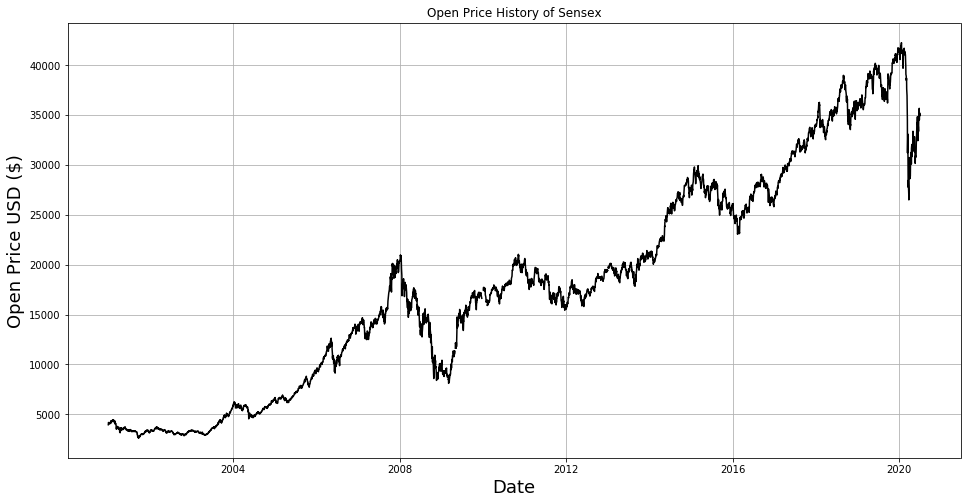

In [66]:
plt.figure(figsize=(16,8))
plt.title('Open Price History of Sensex')
plt.plot(sensex_df['publish_date'],sensex_df['Open'],color='black')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open Price USD ($)',fontsize=18)
plt.grid()
plt.show()


- **Plotting Close Index of market**

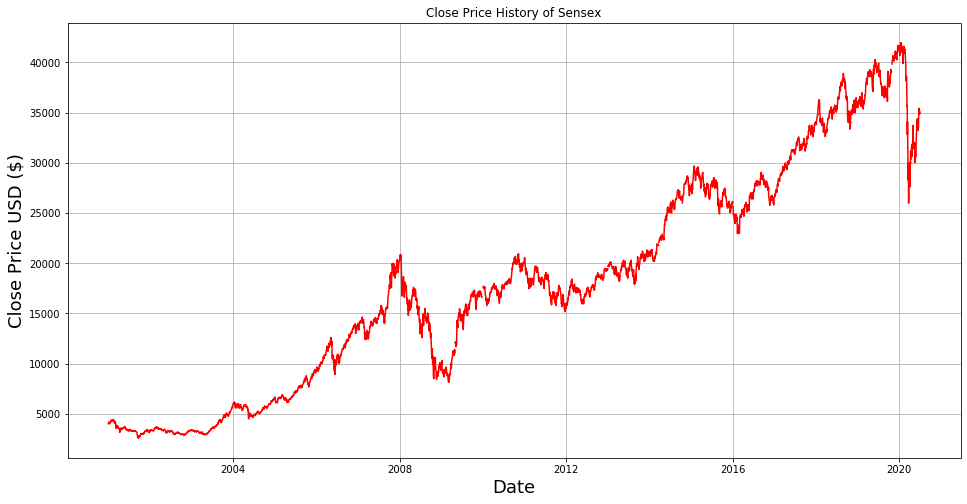

In [67]:
plt.figure(figsize=(16,8))
plt.title('Close Price History of Sensex')
plt.plot(sensex_df['publish_date'],sensex_df['Close'],color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.grid()
plt.show()


- In order to perform a time series analysis, we may need to **separate seasonality and trend from our series**. The resultant series will become stationary through this process.

 -- So let us separate Trend and Seasonality from the time series

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

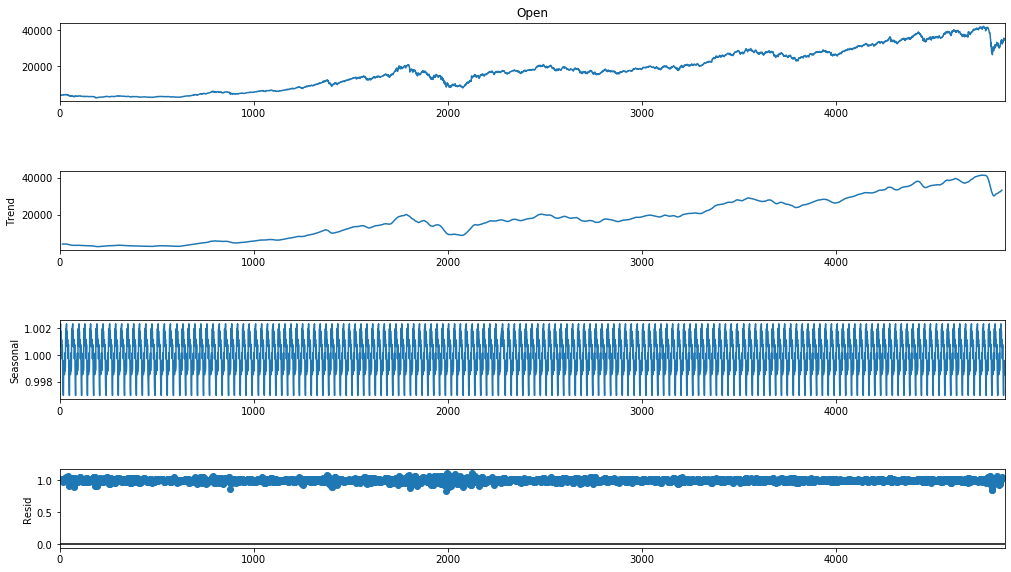

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(sensex_df['Open'].dropna(), model='multiplicative', freq = 30)
fig = plt.figure()  
fig = sea_dec.plot()  
fig.set_size_inches(16, 9)
plt.show()


### Merging of dataset
- We have to merge on date

In [105]:
df_m=pd.merge(new_df, sensex_df, how='outer', on='publish_date' )
df_m.shape

(7107, 12)

In [106]:
df_m['headline_text'].isnull().sum()


34

In [107]:
df_m.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4.795000e+03
mean,18034.262572,18143.666605,17890.044829,18013.912100,18013.912100,8.189135e+04
std,10823.411039,10859.925623,10757.958972,10804.676830,10804.676830,1.080816e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,8394.479981,8485.520020,8268.844726,8378.930176,8378.930176,9.200000e+03
50%,17438.679688,17530.789063,17294.740234,17425.710938,17425.710938,1.380000e+04
75%,26668.965821,26772.745118,26469.004883,26632.209961,26632.209961,2.080000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


In [108]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7107 entries, 0 to 7106
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   7107 non-null   datetime64[ns]
 1   headline_text  7073 non-null   object        
 2   compund        7073 non-null   object        
 3   negative       7073 non-null   object        
 4   neutral        7073 non-null   object        
 5   positive       7073 non-null   object        
 6   Open           4795 non-null   float64       
 7   High           4795 non-null   float64       
 8   Low            4795 non-null   float64       
 9   Close          4795 non-null   float64       
 10  Adj Close      4795 non-null   float64       
 11  Volume         4795 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 721.8+ KB


#### Dealing with Null Values
- There are many null values so to overcome we cant remove them
- Also we can't delete all that rows<br>
**Solution**
- Taking average of<br> 1. The first filled  value in column and <br> 2. next filled value

In [109]:
for col in ['compund','negative','neutral','positive','Close']:
    df_m[col]=pd.concat([df_m[col].ffill(),df_m[col].bfill()]).groupby(level=0).mean()

In [111]:
# df_m.dropna()
df_m.head()

,publish_date,headline_text,compund,negative,neutral,positive,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,-0.9426,0.108,0.820,0.073,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,Powerless north India gropes in the dark.Think...,0.5859,0.085,0.818,0.097,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,-0.5468,0.083,0.844,0.073,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,Light combat craft takes India into club class...,0.9854,0.103,0.744,0.153,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-06,Light combat craft takes India into club class...,0.4404,0.118,0.709,0.172,NaN,NaN,NaN,4152.080078,NaN,NaN


In [112]:
df_m.to_csv('Final Prepocessed Data.csv')

In [113]:
final_df=df_m[['publish_date','compund','negative','neutral','positive','Close']]

In [114]:
final_df

,publish_date,compund,negative,neutral,positive,Close
0,2001-01-02,-0.9426,0.108,0.820,0.073,4018.879883
1,2001-01-03,0.5859,0.085,0.818,0.097,4060.020020
2,2001-01-04,-0.5468,0.083,0.844,0.073,4115.370117
3,2001-01-05,0.9854,0.103,0.744,0.153,4183.729980
4,2001-01-06,0.4404,0.118,0.709,0.172,4152.080078
...,...,...,...,...,...,...
7102,2001-06-14,-0.9998,0.117,0.821,0.062,3453.770020
7103,2001-06-15,-0.9998,0.117,0.821,0.062,3372.939941
7104,2001-06-18,-0.9998,0.117,0.821,0.062,3353.110107
7105,2001-06-19,-0.9998,0.117,0.821,0.062,3410.949951


*Dropping all null values*

In [116]:

final_df.dropna()

,publish_date,compund,negative,neutral,positive,Close
0,2001-01-02,-0.9426,0.108,0.820,0.073,4018.879883
1,2001-01-03,0.5859,0.085,0.818,0.097,4060.020020
2,2001-01-04,-0.5468,0.083,0.844,0.073,4115.370117
3,2001-01-05,0.9854,0.103,0.744,0.153,4183.729980
4,2001-01-06,0.4404,0.118,0.709,0.172,4152.080078
...,...,...,...,...,...,...
7102,2001-06-14,-0.9998,0.117,0.821,0.062,3453.770020
7103,2001-06-15,-0.9998,0.117,0.821,0.062,3372.939941
7104,2001-06-18,-0.9998,0.117,0.821,0.062,3353.110107
7105,2001-06-19,-0.9998,0.117,0.821,0.062,3410.949951


In [117]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7107 entries, 0 to 7106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_date  7107 non-null   datetime64[ns]
 1   compund       7107 non-null   float64       
 2   negative      7107 non-null   float64       
 3   neutral       7107 non-null   float64       
 4   positive      7107 non-null   float64       
 5   Close         7107 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 388.7 KB


In [118]:
final_df.shape

(7107, 6)

## Hybrid Model
- Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import random
from sklearn import preprocessing
min_max_scalar=preprocessing.MinMaxScaler()

import pandas as pd
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error
from sklearn.linear_model import LinearRegression


#### How To select train Test data in time series data as last and next data is related?<br>
**Solution:**<br>
- Select n % of fields from starting than remaining for test

In [122]:
training_size=int(len(final_df)*0.80)
test_size=len(final_df)-training_size
train_data,test_data=final_df[0:training_size],final_df[training_size:len(final_df)]
test_data.reset_index(inplace=True)
test_data.drop('index',inplace=True,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
X=final_df[['compund','negative','neutral','positive']]
# X=df[['neg','neu','pos']]
# Y=df[['Close']]/400     #normalize it
Y=final_df[['Close']]

In [237]:

X_train=train_data[['compund','negative','neutral','positive']]
Y_train=train_data[['Close']]
X_test=test_data[['compund','negative','neutral','positive']]
Y_test=test_data[['Close']]

**Transforming Data**

In [238]:
X_train=min_max_scalar.fit_transform(X_train)
X_test=min_max_scalar.fit_transform(X_test)
Y_train=min_max_scalar.fit_transform(Y_train)
Y_test=min_max_scalar.fit_transform(Y_test)

**MLP Regressor**

In [239]:
#change hidden layer,learning rate,activation function,validation fraction...etc
MLP=MLPRegressor(hidden_layer_sizes=(3,2),learning_rate='adaptive')

In [240]:
MLP.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(3, 2), learning_rate='adaptive')

In [243]:
mlp_predicted=MLP.predict(X_test)

In [244]:
print(r2_score(Y_test,mlp_predicted))
print(mean_absolute_error(Y_test,mlp_predicted))
print(mean_squared_error(Y_test,mlp_predicted))
print(mean_squared_log_error(Y_test,mlp_predicted))
print(median_absolute_error(Y_test,mlp_predicted))


-1.011599726165206
0.18952085526442253
0.05152699138868307
0.01919365651655516
0.17247106917494592


**Random Forest Regressor**

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rfReg=RandomForestRegressor()

In [151]:
rfReg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [152]:
rfPred=rfReg.predict(X_test)

In [153]:
print(r2_score(Y_test,rfPred))
print(mean_absolute_error(Y_test,rfPred))
print(mean_squared_error(Y_test,rfPred))
print(median_absolute_error(Y_test,rfPred))

-3.6833761472049575
0.32339532969925966
0.11996436431567437
0.32135541985288596


**LinearRegression**

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lr=LinearRegression()

In [139]:
lr.fit(X_train,Y_train)
lr_Y_predicted=lr.predict(X_test)


In [141]:
print(r2_score(Y_test,lr_Y_predicted))
print(mean_absolute_error(Y_test,lr_Y_predicted))
print(mean_squared_error(Y_test,lr_Y_predicted))
print(median_absolute_error(Y_test,lr_Y_predicted))

-54.384975610493235
0.9662862158638302
1.4186824168964578
0.8310378052601859


**Support Vector Regressor**

In [154]:
from sklearn.svm import SVR

In [155]:
svc=SVR(C=1.0, epsilon=0.2)

In [156]:
svc.fit(X_train,Y_train)
svc_Y_predicted=svc.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [157]:
print(r2_score(Y_test,svc_Y_predicted))
print(mean_absolute_error(Y_test,svc_Y_predicted))
print(mean_squared_error(Y_test,svc_Y_predicted))
print(median_absolute_error(Y_test,svc_Y_predicted))

-17.862257270723422
0.6537560775006962
0.48315544853075315
0.6762461667506012


**CROSS VALIDATION**

In [158]:
from sklearn.model_selection import KFold,cross_val_predict

In [159]:
cv_pred=cross_val_predict(rfReg,X,Y.values.ravel())

In [160]:
print(r2_score(Y,cv_pred))
print(mean_absolute_error(Y,cv_pred))
print(mean_squared_error(Y,cv_pred))
print(median_absolute_error(Y,cv_pred))

0.11454989491304746
8771.861275586622
103154040.52724947
8420.844824155


**Artificial Neural Network(ANN)**

In [161]:
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras import activations


In [183]:
model.add(Dense(4,activation=activations.sigmoid,input_shape=(4,)))
# model.add(Dense(3,activation='relu',input_shape=(3,)))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(1,activation=activations.sigmoid))

In [184]:
model.compile(optimizer='adam',loss=losses.mean_absolute_error)

In [185]:
model.fit(X_train,Y_train,verbose=2,epochs=1000)

Epoch 1/1000
178/178 - 0s - loss: 0.2474
Epoch 2/1000
178/178 - 0s - loss: 0.2478
Epoch 3/1000
178/178 - 0s - loss: 0.2457
Epoch 4/1000
178/178 - 0s - loss: 0.2458
Epoch 5/1000
178/178 - 0s - loss: 0.2456
Epoch 6/1000
178/178 - 0s - loss: 0.1901
Epoch 7/1000
178/178 - 0s - loss: 0.1684
Epoch 8/1000
178/178 - 0s - loss: 0.1684
Epoch 9/1000
178/178 - 0s - loss: 0.1686
Epoch 10/1000
178/178 - 0s - loss: 0.1689
Epoch 11/1000
178/178 - 0s - loss: 0.1678
Epoch 12/1000
178/178 - 0s - loss: 0.1673
Epoch 13/1000
178/178 - 0s - loss: 0.1665
Epoch 14/1000
178/178 - 0s - loss: 0.1666
Epoch 15/1000
178/178 - 0s - loss: 0.1664
Epoch 16/1000
178/178 - 0s - loss: 0.1674
Epoch 17/1000
178/178 - 0s - loss: 0.1678
Epoch 18/1000
178/178 - 0s - loss: 0.1669
Epoch 19/1000
178/178 - 0s - loss: 0.1670
Epoch 20/1000
178/178 - 0s - loss: 0.1661
Epoch 21/1000
178/178 - 0s - loss: 0.1668
Epoch 22/1000
178/178 - 0s - loss: 0.1660
Epoch 23/1000
178/178 - 0s - loss: 0.1655
Epoch 24/1000
178/178 - 0s - loss: 0.1655
E

178/178 - 0s - loss: 0.1638
Epoch 195/1000
178/178 - 0s - loss: 0.1645
Epoch 196/1000
178/178 - 0s - loss: 0.1643
Epoch 197/1000
178/178 - 0s - loss: 0.1642
Epoch 198/1000
178/178 - 0s - loss: 0.1649
Epoch 199/1000
178/178 - 0s - loss: 0.1648
Epoch 200/1000
178/178 - 0s - loss: 0.1644
Epoch 201/1000
178/178 - 0s - loss: 0.1636
Epoch 202/1000
178/178 - 0s - loss: 0.1641
Epoch 203/1000
178/178 - 0s - loss: 0.1636
Epoch 204/1000
178/178 - 0s - loss: 0.1647
Epoch 205/1000
178/178 - 0s - loss: 0.1639
Epoch 206/1000
178/178 - 0s - loss: 0.1650
Epoch 207/1000
178/178 - 0s - loss: 0.1642
Epoch 208/1000
178/178 - 0s - loss: 0.1646
Epoch 209/1000
178/178 - 0s - loss: 0.1646
Epoch 210/1000
178/178 - 0s - loss: 0.1643
Epoch 211/1000
178/178 - 0s - loss: 0.1645
Epoch 212/1000
178/178 - 0s - loss: 0.1640
Epoch 213/1000
178/178 - 0s - loss: 0.1645
Epoch 214/1000
178/178 - 0s - loss: 0.1645
Epoch 215/1000
178/178 - 0s - loss: 0.1641
Epoch 216/1000
178/178 - 0s - loss: 0.1652
Epoch 217/1000
178/178 - 0

Epoch 385/1000
178/178 - 0s - loss: 0.1635
Epoch 386/1000
178/178 - 0s - loss: 0.1643
Epoch 387/1000
178/178 - 0s - loss: 0.1635
Epoch 388/1000
178/178 - 0s - loss: 0.1636
Epoch 389/1000
178/178 - 0s - loss: 0.1639
Epoch 390/1000
178/178 - 0s - loss: 0.1633
Epoch 391/1000
178/178 - 0s - loss: 0.1649
Epoch 392/1000
178/178 - 0s - loss: 0.1637
Epoch 393/1000
178/178 - 0s - loss: 0.1638
Epoch 394/1000
178/178 - 0s - loss: 0.1634
Epoch 395/1000
178/178 - 0s - loss: 0.1644
Epoch 396/1000
178/178 - 0s - loss: 0.1644
Epoch 397/1000
178/178 - 0s - loss: 0.1646
Epoch 398/1000
178/178 - 0s - loss: 0.1639
Epoch 399/1000
178/178 - 0s - loss: 0.1640
Epoch 400/1000
178/178 - 0s - loss: 0.1637
Epoch 401/1000
178/178 - 0s - loss: 0.1639
Epoch 402/1000
178/178 - 0s - loss: 0.1645
Epoch 403/1000
178/178 - 0s - loss: 0.1636
Epoch 404/1000
178/178 - 0s - loss: 0.1635
Epoch 405/1000
178/178 - 0s - loss: 0.1637
Epoch 406/1000
178/178 - 0s - loss: 0.1642
Epoch 407/1000
178/178 - 0s - loss: 0.1634
Epoch 408/1

Epoch 576/1000
178/178 - 0s - loss: 0.1641
Epoch 577/1000
178/178 - 0s - loss: 0.1635
Epoch 578/1000
178/178 - 0s - loss: 0.1636
Epoch 579/1000
178/178 - 0s - loss: 0.1639
Epoch 580/1000
178/178 - 0s - loss: 0.1636
Epoch 581/1000
178/178 - 0s - loss: 0.1641
Epoch 582/1000
178/178 - 0s - loss: 0.1632
Epoch 583/1000
178/178 - 0s - loss: 0.1641
Epoch 584/1000
178/178 - 0s - loss: 0.1637
Epoch 585/1000
178/178 - 0s - loss: 0.1635
Epoch 586/1000
178/178 - 0s - loss: 0.1637
Epoch 587/1000
178/178 - 0s - loss: 0.1640
Epoch 588/1000
178/178 - 0s - loss: 0.1641
Epoch 589/1000
178/178 - 0s - loss: 0.1633
Epoch 590/1000
178/178 - 0s - loss: 0.1636
Epoch 591/1000
178/178 - 0s - loss: 0.1636
Epoch 592/1000
178/178 - 0s - loss: 0.1636
Epoch 593/1000
178/178 - 0s - loss: 0.1639
Epoch 594/1000
178/178 - 0s - loss: 0.1632
Epoch 595/1000
178/178 - 0s - loss: 0.1636
Epoch 596/1000
178/178 - 0s - loss: 0.1630
Epoch 597/1000
178/178 - 0s - loss: 0.1632
Epoch 598/1000
178/178 - 0s - loss: 0.1637
Epoch 599/1

Epoch 767/1000
178/178 - 0s - loss: 0.1634
Epoch 768/1000
178/178 - 0s - loss: 0.1644
Epoch 769/1000
178/178 - 0s - loss: 0.1630
Epoch 770/1000
178/178 - 0s - loss: 0.1630
Epoch 771/1000
178/178 - 0s - loss: 0.1634
Epoch 772/1000
178/178 - 0s - loss: 0.1636
Epoch 773/1000
178/178 - 0s - loss: 0.1634
Epoch 774/1000
178/178 - 0s - loss: 0.1634
Epoch 775/1000
178/178 - 0s - loss: 0.1634
Epoch 776/1000
178/178 - 0s - loss: 0.1642
Epoch 777/1000
178/178 - 0s - loss: 0.1644
Epoch 778/1000
178/178 - 0s - loss: 0.1635
Epoch 779/1000
178/178 - 0s - loss: 0.1635
Epoch 780/1000
178/178 - 0s - loss: 0.1633
Epoch 781/1000
178/178 - 0s - loss: 0.1642
Epoch 782/1000
178/178 - 0s - loss: 0.1634
Epoch 783/1000
178/178 - 0s - loss: 0.1640
Epoch 784/1000
178/178 - 0s - loss: 0.1629
Epoch 785/1000
178/178 - 0s - loss: 0.1633
Epoch 786/1000
178/178 - 0s - loss: 0.1634
Epoch 787/1000
178/178 - 0s - loss: 0.1627
Epoch 788/1000
178/178 - 0s - loss: 0.1635
Epoch 789/1000
178/178 - 0s - loss: 0.1636
Epoch 790/1

Epoch 958/1000
178/178 - 0s - loss: 0.1644
Epoch 959/1000
178/178 - 0s - loss: 0.1631
Epoch 960/1000
178/178 - 0s - loss: 0.1636
Epoch 961/1000
178/178 - 0s - loss: 0.1641
Epoch 962/1000
178/178 - 0s - loss: 0.1642
Epoch 963/1000
178/178 - 0s - loss: 0.1634
Epoch 964/1000
178/178 - 0s - loss: 0.1635
Epoch 965/1000
178/178 - 0s - loss: 0.1634
Epoch 966/1000
178/178 - 0s - loss: 0.1635
Epoch 967/1000
178/178 - 0s - loss: 0.1632
Epoch 968/1000
178/178 - 0s - loss: 0.1641
Epoch 969/1000
178/178 - 0s - loss: 0.1632
Epoch 970/1000
178/178 - 0s - loss: 0.1646
Epoch 971/1000
178/178 - 0s - loss: 0.1645
Epoch 972/1000
178/178 - 0s - loss: 0.1631
Epoch 973/1000
178/178 - 0s - loss: 0.1638
Epoch 974/1000
178/178 - 0s - loss: 0.1631
Epoch 975/1000
178/178 - 0s - loss: 0.1635
Epoch 976/1000
178/178 - 0s - loss: 0.1631
Epoch 977/1000
178/178 - 0s - loss: 0.1636
Epoch 978/1000
178/178 - 0s - loss: 0.1642
Epoch 979/1000
178/178 - 0s - loss: 0.1635
Epoch 980/1000
178/178 - 0s - loss: 0.1640
Epoch 981/1

In [186]:
ANN_y_pred=model.predict(X_test)


In [187]:
ANN_y_train_pred=model.predict(X_train)


In [188]:
model.evaluate(X_train,Y_train)


178/178 [==============================] - 0s 469us/step - loss: 0.1621


0.16206179559230804

In [189]:
model.evaluate(X_test,ANN_y_pred)


45/45 [==============================] - 0s 500us/step - loss: 0.0000e+00


0.0

In [190]:
print(r2_score(Y_test,ANN_y_pred))
print(mean_absolute_error(Y_test,ANN_y_pred))
print(mean_squared_error(Y_test,ANN_y_pred))
print(median_absolute_error(Y_test,ANN_y_pred))

-3.4495427449039067
0.2666240025326376
0.11397473747787314
0.20847031938312527


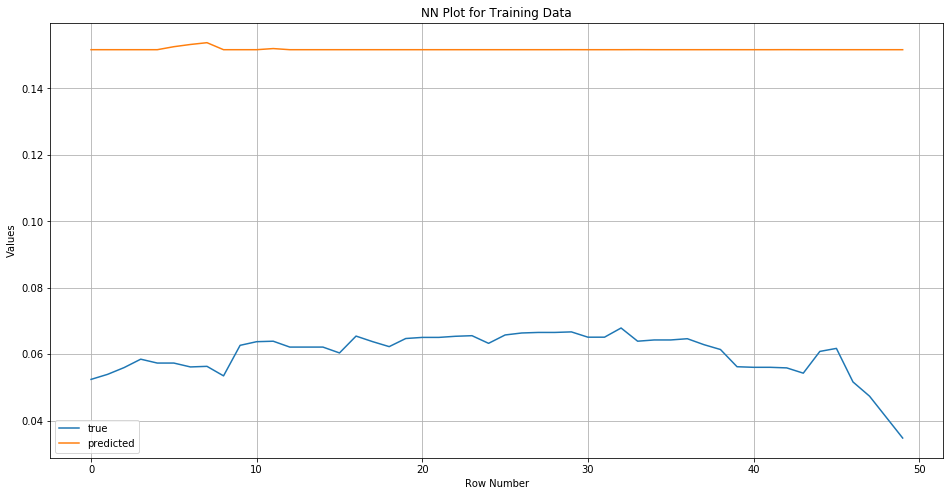

In [191]:
plt.figure(figsize=(16,8))

# df1=pd.read_csv('NN-DATA-all.csv',usecols=['Y'])

# df2=pd.read_csv('NN-DATA-all.csv',usecols=['Y-ENN'])

# df3=pd.read_csv('NN-DATA-all.csv',usecols=['Y-ANN'])

# data1 = df1.values.tolist()
# data2 = df2.values.tolist()
# data3 = df3.values.tolist()
YO=Y_train.tolist()+Y_test.tolist()
yp=ANN_y_train_pred.tolist()+ANN_y_pred.tolist()
# plt.plot(range(705),data1, label='Y')
plt.plot(YO[:50], label='true')
plt.plot(yp[:50], label='predicted')

plt.xlabel('Row Number')
plt.ylabel('Values')

plt.title("NN Plot for Training Data")

plt.legend()
plt.grid()
plt.show()


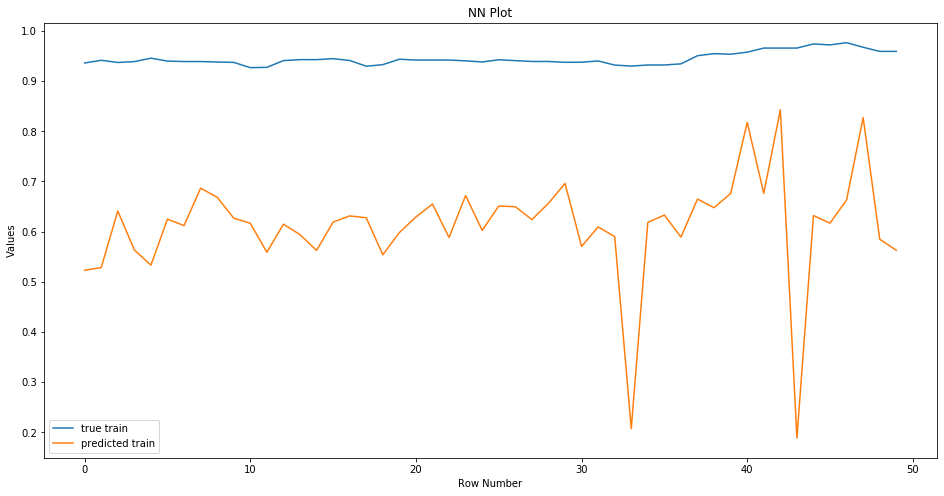

In [192]:
plt.figure(figsize=(16,8))
plt.plot(Y_train[len(ANN_y_train_pred)-50:], label='true train')
plt.plot(ANN_y_train_pred[len(ANN_y_train_pred)-50:], label='predicted train')

plt.xlabel('Row Number')
plt.ylabel('Values')

plt.title("NN Plot")

plt.legend()

plt.show()


In [179]:
model.save('ANN_model_full.h5')

In [182]:
model.layers

### ALL Models Accuracy

In [268]:
import math
print("Model Name   | r2_score          | mean_absolute_error | mean_squared_error | median_absolute_error | root_mean_squared_error")
print("ANN          |{}|{}   |{} |{}    |{} ".format(r2_score(Y_test,ANN_y_pred),mean_absolute_error(Y_test,ANN_y_pred),mean_squared_error(Y_test,ANN_y_pred),median_absolute_error(Y_test,ANN_y_pred),math.sqrt(mean_squared_error(Y_test,ANN_y_pred))))
print("MLP          |{} |{}  |{} |{}    |{}".format(r2_score(Y_test,mlp_predicted),mean_absolute_error(Y_test,mlp_predicted),mean_squared_error(Y_test,mlp_predicted),median_absolute_error(Y_test,mlp_predicted),math.sqrt(mean_squared_error(Y_test,mlp_predicted))))
print("SVC          |{}|{}   |{} |{}     |{} ".format(r2_score(Y_test,svc_Y_predicted),mean_absolute_error(Y_test,svc_Y_predicted),mean_squared_error(Y_test,svc_Y_predicted),median_absolute_error(Y_test,svc_Y_predicted),math.sqrt(mean_squared_error(Y_test,svc_Y_predicted))))
print("RandomForest |{}|{}  |{} |{}    |{} ".format(r2_score(Y_test,rfPred),mean_absolute_error(Y_test,rfPred),mean_squared_error(Y_test,rfPred),median_absolute_error(Y_test,rfPred),math.sqrt(mean_squared_error(Y_test,rfPred))))
print("LinearRegr   |{}|{}   |{}  |{}     |{} ".format(r2_score(Y_test,lr_Y_predicted),mean_absolute_error(Y_test,lr_Y_predicted),mean_squared_error(Y_test,lr_Y_predicted),median_absolute_error(Y_test,lr_Y_predicted),math.sqrt(mean_squared_error(Y_test,lr_Y_predicted))))
print("RFCV         |{}|{}    |{}  |{}         |{}".format(r2_score(Y,cv_pred),mean_absolute_error(Y,cv_pred),mean_squared_error(Y,cv_pred),median_absolute_error(Y,cv_pred),math.sqrt(mean_squared_error(Y,cv_pred))))


Model Name   | r2_score          | mean_absolute_error | mean_squared_error | median_absolute_error | root_mean_squared_error
ANN          |-3.4495427449039067|0.2666240025326376   |0.11397473747787314 |0.20847031938312527    |0.3376014476833195 
MLP          |-1.011599726165206 |0.18952085526442253  |0.05152699138868307 |0.17247106917494592    |0.22699557570288253
SVC          |-17.862257270723422|0.6537560775006962   |0.48315544853075315 |0.6762461667506012     |0.6950938415284321 
RandomForest |-3.6833761472049575|0.32339532969925966  |0.11996436431567437 |0.32135541985288596    |0.3463587220147262 
LinearRegr   |-54.384975610493235|0.9662862158638302   |1.4186824168964578  |0.8310378052601859     |1.1910845548895586 
RFCV         |0.11454989491304746|8771.861275586622    |103154040.52724947  |8420.844824155         |10156.477761864566


**Thank You!**